In [35]:
import pandas as pd
import json
from ast import literal_eval

   ***TEXT CLASSIFICATION. IT TAKES THE OVERVIEW AS THE INPUT AND TRIES TO PREDICT THE GENRE OF THE MOVIE***

In [36]:

#Loading movies data

movies = pd.read_csv('movies_metadata.csv')
movies.head()


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [37]:
#converting the data in json format to a list of elements containing only the genre of the movie
def  get_value(x):
    l = []
    if isinstance(x,list):
        for i in x:
           l.append(i['name'])
        return l
    return []
movies['genres'] = movies['genres'].apply(literal_eval)
movies['genres'] = movies['genres'].apply(get_value)
print(movies['genres'])

0         [Animation, Comedy, Family]
1        [Adventure, Fantasy, Family]
2                   [Romance, Comedy]
3            [Comedy, Drama, Romance]
4                            [Comedy]
                     ...             
45461                 [Drama, Family]
45462                         [Drama]
45463       [Action, Drama, Thriller]
45464                              []
45465                              []
Name: genres, Length: 45466, dtype: object


In [38]:
#considering only movies which contains genre genres 
movies = movies[movies['genres'].map(lambda d: len(d)) > 0]

In [39]:
#Removing unwanted text from overview
use_columns = ['overview','genres']
movies_data = pd.DataFrame(movies,columns = use_columns)
movies_data = movies_data.dropna(axis = 0,subset = ['overview'])
movies_data['overview'] = movies_data['overview'].str.replace('[^\w\s]','').str.lower()
movies_data[:20]

,overview,genres
0,led by woody andys toys live happily in his ro...,"[Animation, Comedy, Family]"
1,when siblings judy and peter discover an encha...,"[Adventure, Fantasy, Family]"
2,a family wedding reignites the ancient feud be...,"[Romance, Comedy]"
3,cheated on mistreated and stepped on the women...,"[Comedy, Drama, Romance]"
4,just when george banks has recovered from his ...,[Comedy]
5,obsessive master thief neil mccauley leads a t...,"[Action, Crime, Drama, Thriller]"
6,an ugly duckling having undergone a remarkable...,"[Comedy, Romance]"
7,a mischievous young boy tom sawyer witnesses a...,"[Action, Adventure, Drama, Family]"
8,international action superstar jean claude van...,"[Action, Adventure, Thriller]"
9,james bond must unmask the mysterious head of ...,"[Adventure, Action, Thriller]"


In [40]:
#listing value counts of genre
movies_data['genres'].value_counts()


[Drama]                                        4910
[Comedy]                                       3372
[Documentary]                                  2685
[Drama, Romance]                               1291
[Comedy, Drama]                                1110
                                               ... 
[Drama, Family, Animation, Adventure]             1
[Adventure, Crime, Drama, Mystery, Western]       1
[Romance, History, Drama, Family]                 1
[Fantasy, Animation, Drama, Family]               1
[Music, Comedy, Romance, Fantasy]                 1
Name: genres, Length: 4048, dtype: int64

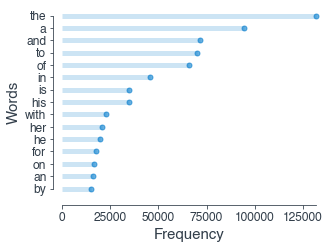

In [41]:
#Finding the most frequent words
import re,nltk
import matplotlib.pyplot as plt
import numpy as np
words=movies_data['overview'].str.cat(sep=' ') 
word_list=re.findall(r'\w+', words)

frequent_words=nltk.FreqDist(word_list)
frequent_word_list=frequent_words.most_common(15)
words,frequency=zip(*frequent_word_list)


#the code for plotting the graph was referred from stack overflow
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'
word_frequency = pd.Series(frequency,
                        index=words)
df = pd.DataFrame({'word_frequency' : word_frequency})
df = df.sort_values(by='word_frequency')
my_range=list(range(1,len(df.index)+1))
fig, ax = plt.subplots(figsize=(5,3.5))
plt.hlines(y=my_range, xmin=0, xmax=df['word_frequency'], color='#007ACC', alpha=0.2, linewidth=5)
plt.plot(df['word_frequency'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)
ax.set_xlabel('Frequency', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('Words',fontsize=15, fontweight='black', color = '#333F4B')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))
plt.show()




In [42]:
#Removing stop words
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_list=word_tokenize(text)
    filtered_words = [word for word in word_list if not word in stop_words]
    filtered_text=' '.join(filtered_words)
    return filtered_text
movies_data['overview']=movies_data['overview'].apply(lambda text: remove_stopwords(text))

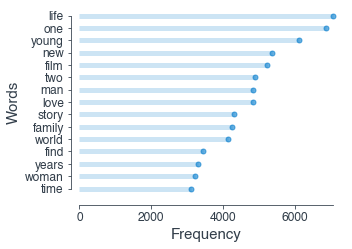

In [43]:
# we can observe that most of the stop words have been eliminated
import re,nltk
import matplotlib.pyplot as plt
import numpy as np
words=movies_data['overview'].str.cat(sep=' ') 
word_list=re.findall(r'\w+', words)

frequent_words=nltk.FreqDist(word_list)
frequent_word_list=frequent_words.most_common(15)
words,frequency=zip(*frequent_word_list)


#the code for plotting the graph was referred from stack overflow
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Helvetica'
plt.rcParams['axes.edgecolor']='#333F4B'
plt.rcParams['axes.linewidth']=0.8
plt.rcParams['xtick.color']='#333F4B'
plt.rcParams['ytick.color']='#333F4B'
plt.rcParams['text.color']='#333F4B'
word_frequency = pd.Series(frequency,
                        index=words)
df = pd.DataFrame({'word_frequency' : word_frequency})
df = df.sort_values(by='word_frequency')
my_range=list(range(1,len(df.index)+1))
fig, ax = plt.subplots(figsize=(5,3.5))
plt.hlines(y=my_range, xmin=0, xmax=df['word_frequency'], color='#007ACC', alpha=0.2, linewidth=5)
plt.plot(df['word_frequency'], my_range, "o", markersize=5, color='#007ACC', alpha=0.6)
ax.set_xlabel('Frequency', fontsize=15, fontweight='black', color = '#333F4B')
ax.set_ylabel('Words',fontsize=15, fontweight='black', color = '#333F4B')
ax.tick_params(axis='both', which='major', labelsize=12)
plt.yticks(my_range, df.index)
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_smart_bounds(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_position(('axes', -0.04))
ax.spines['left'].set_position(('axes', 0.015))
plt.show()



In [44]:
#Performing Stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def stem(text):
    stemmed_text = ""
    word_list=text.split()
    for word in word_list:
        stem = stemmer.stem(word)
        stemmed_text += stem+" "
    stemmed_text = stemmed_text.strip()
    return stemmed_text

movies_data['overview'] = movies_data['overview'].apply(lambda x:stem(x))
print(movies_data['overview'].head())


0    led woodi andi toy live happili room andi birt...
1    sibl judi peter discov enchant board game open...
2    famili wed reignit ancient feud nextdoor neigh...
3    cheat mistreat step women hold breath wait elu...
4    georg bank recov daughter wed receiv news shes...
Name: overview, dtype: object


In [45]:
#Performing lemmatization
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()
def lemmatization(text):
    lemmantized_text = ""
    word_list=text.split()
    for word in word_list:
        lemmant = lemmatizer.lemmatize(word, pos="v")
        lemmantized_text += lemmant+" "
    lemmantized_text = lemmantized_text.strip()
    return lemmantized_text

movies_data['overview'] = movies_data['overview'].apply(lambda x:lemmatization(x))
print(movies_data['overview'].head())

0    lead woodi andi toy live happili room andi bir...
1    sibl judi peter discov enchant board game open...
2    famili wed reignit ancient feud nextdoor neigh...
3    cheat mistreat step women hold breath wait elu...
4    georg bank recov daughter wed receiv news shes...
Name: overview, dtype: object


In [46]:
#Transforming y using multilabel_binarizer
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer
multilabel_binarizer = MultiLabelBinarizer()
y=pd.DataFrame(multilabel_binarizer.fit_transform(movies_data['genres']))

In [47]:
#splitting data into train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(movies_data['overview'], y, test_size=0.3, random_state=9)

In [48]:
# Hyper parameter tuning using Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', OneVsRestClassifier(LogisticRegression())),])
parameters = {
    'tfidf__max_df': (0.5,0.7,0.75,0.8,0.85),
    'tfidf__ngram_range': [(1, 2), (1, 3)],
    'tfidf__min_df' : (1,5,10,15),
}
 
grid = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid.fit(x_train, y_train)

print("Best parameters set:")
print(grid.best_estimator_.steps)

Fitting 2 folds for each of 40 candidates, totalling 80 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done  80 out of  80 | elapsed:  6.4min finished
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Best parameters set:
[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=15, ngram_range=(1, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)), ('clf', OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
             

In [49]:
#converting a collection of raw text to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
#The hyper parameters are obtained from grid search cv
tfidf=TfidfVectorizer(analyzer='word', binary=False, decode_error='strict', encoding='utf-8',
                input='content', lowercase=True, max_df=0.5, max_features=None,
                min_df=15, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)
tfidf.fit(movies_data['overview'])


x_train = tfidf.transform(x_train)
x_test = tfidf.transform(x_test)

print(tfidf.vocabulary_)

{'lead': 5655, 'woodi': 11154, 'andi': 547, 'toy': 10215, 'live': 5865, 'happili': 4619, 'room': 8578, 'birthday': 1189, 'bring': 1371, 'buzz': 1480, 'onto': 7281, 'scene': 8721, 'afraid': 359, 'lose': 5987, 'place': 7679, 'heart': 4697, 'plot': 7726, 'circumst': 1811, 'separ': 8897, 'owner': 7401, 'duo': 2986, 'eventu': 3319, 'learn': 5675, 'put': 8055, 'asid': 714, 'differ': 2693, 'live happili': 5877, 'put asid': 8056, 'asid differ': 715, 'sibl': 9058, 'judi': 5420, 'peter': 7607, 'discov': 2741, 'enchant': 3165, 'board': 1239, 'game': 4168, 'open': 7283, 'door': 2874, 'magic': 6115, 'world': 11175, 'unwit': 10626, 'invit': 5254, 'alan': 405, 'adult': 329, 'whos': 11027, 'trap': 10258, 'insid': 5164, '26': 172, 'year': 11264, 'hope': 4898, 'freedom': 4063, 'finish': 3836, 'prove': 7999, 'riski': 8508, 'three': 10061, 'find': 3753, 'run': 8609, 'giant': 4294, 'evil': 3353, 'monkey': 6635, 'terrifi': 9971, 'creatur': 2250, 'open door': 7284, 'trap insid': 10259, 'year live': 11277, 'l

In [50]:
# Creating a model using One vs rest classifier with MultinomialNB for classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import f1_score
#The hyper parameters are obtained from grid search cv
naive_classifier = MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True)
classifier = OneVsRestClassifier(naive_classifier)
# fit model on train data
classifier.fit(x_train, y_train)
# make predictions for validation set
y_pred = classifier.predict(x_test)
print("The matrics classification report is as follows")
print(metrics.classification_report(y_test, y_pred))
print("The f1 score is",f1_score(y_test, y_pred, average="micro"))

The matrics classification report is as follows
              precision    recall  f1-score   support

           0       0.80      0.19      0.31      1994
           1       0.77      0.02      0.04      1029
           2       1.00      0.01      0.02       553
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.75      0.31      0.44      3840
           7       0.69      0.06      0.11      1334
           8       0.89      0.29      0.44      1144
           9       0.70      0.68      0.69      5923
          10       0.93      0.02      0.03       809
          11       0.50      0.00      0.01       702
          12       0.00      0.00      0.00       472
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00       398
          15       0.92      0.12      0.21      1429
          16       0.00      0.00

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [51]:
# Creating a model using One vs rest classifier with Linear SVC for classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.svm import LinearSVC
#The hyper parameters are obtained from grid search cv
svc_classifier=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0)

classifier = OneVsRestClassifier(svc_classifier)
classifier.fit(x_train,y_train)
# predict the labels on validation dataset
y_pred= classifier.predict(x_test)
print("The matrics classification report is as follows")
print(metrics.classification_report(y_test, y_pred))
print("The f1 score is ",f1_score(y_test, y_pred, average="micro"))




The matrics classification report is as follows
              precision    recall  f1-score   support

           0       0.62      0.44      0.51      1994
           1       0.51      0.23      0.31      1029
           2       0.67      0.30      0.42       553
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.62      0.52      0.57      3840
           7       0.53      0.29      0.37      1334
           8       0.82      0.63      0.71      1144
           9       0.66      0.67      0.66      5923
          10       0.60      0.27      0.37       809
          11       0.53      0.18      0.27       702
          12       0.32      0.02      0.04       472
          13       0.00      0.00      0.00         0
          14       0.41      0.11      0.17       398
          15       0.74      0.49      0.59      1429
          16       0.00      0.00

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [52]:
# Creating a model using One vs rest classifier with Logistic regression for classification

from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
#The hyper parameters are obtained from grid search cv
logistic_regression = LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)
classifier = OneVsRestClassifier(logistic_regression)

classifier.fit(x_train, y_train)
#prediction on test data
y_pred = classifier.predict(x_test)
print("The matrics classification report is as follows")
print(metrics.classification_report(y_test, y_pred))
print("The f1 score with threshold 0.5 is",f1_score(y_test, y_pred, average="micro"))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The matrics classification report is as follows
              precision    recall  f1-score   support

           0       0.74      0.30      0.42      1994
           1       0.67      0.10      0.17      1029
           2       0.86      0.11      0.20       553
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.72      0.42      0.54      3840
           7       0.62      0.18      0.28      1334
           8       0.91      0.47      0.62      1144
           9       0.70      0.69      0.69      5923
          10       0.82      0.10      0.18       809
          11       0.70      0.07      0.13       702
          12       0.00      0.00      0.00       472
          13       0.00      0.00      0.00         0
          14       0.38      0.01      0.01       398
          15       0.83      0.32      0.46      1429
          16       0.00      0.00

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [53]:
#changing the threshold to 0.3
y_pred_prob = classifier.predict_proba(x_test)
threshold = 0.3
y_pred_threshold = (y_pred_prob >= threshold).astype(int)
print("The matrics classification report is as follows")
print(metrics.classification_report(y_test, y_pred_threshold))
print("The f1 score is",f1_score(y_test, y_pred_threshold, average="micro"))

The matrics classification report is as follows
              precision    recall  f1-score   support

           0       0.57      0.54      0.55      1994
           1       0.53      0.26      0.35      1029
           2       0.70      0.24      0.36       553
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.55      0.75      0.63      3840
           7       0.56      0.39      0.46      1334
           8       0.81      0.66      0.73      1144
           9       0.58      0.91      0.71      5923
          10       0.71      0.27      0.39       809
          11       0.60      0.19      0.28       702
          12       0.00      0.00      0.00       472
          13       0.00      0.00      0.00         0
          14       0.42      0.07      0.12       398
          15       0.71      0.55      0.62      1429
          16       0.00      0.00

In [54]:
#splitting data into train and test datasets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(movies_data['overview'], y, test_size=0.3, random_state=9)

In [55]:
# Tried another approach using CountVectorizer and TfidfTransformer instead of TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', OneVsRestClassifier(LinearSVC(),n_jobs=-1)),
])


pipeline.fit(x_train,y_train)
y_pred = pipeline.predict(x_test)
print("The matrics classification report is as follows")
print(metrics.classification_report(y_test, y_pred))
print("The f1 score is",f1_score(y_test, y_pred, average="micro"))

The matrics classification report is as follows
              precision    recall  f1-score   support

           0       0.65      0.43      0.52      1994
           1       0.56      0.23      0.32      1029
           2       0.76      0.31      0.44       553
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.64      0.52      0.57      3840
           7       0.58      0.31      0.40      1334
           8       0.82      0.62      0.70      1144
           9       0.67      0.67      0.67      5923
          10       0.67      0.29      0.41       809
          11       0.60      0.19      0.29       702
          12       0.29      0.01      0.02       472
          13       0.00      0.00      0.00         0
          14       0.52      0.10      0.17       398
          15       0.74      0.51      0.61      1429
          16       0.00      0.00

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
